In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv("Wenu.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
Run            100000 non-null int64
Event          100000 non-null int64
pt             100000 non-null float64
eta            100000 non-null float64
phi            100000 non-null float64
Q              100000 non-null int64
type           100000 non-null object
delEta         100000 non-null int64
delPhi         100000 non-null int64
sigmaEtaEta    100000 non-null float64
HoverE         100000 non-null float64
isoTrack       100000 non-null float64
isoEcal        100000 non-null float64
isoHcal        100000 non-null float64
MET            100000 non-null float64
phiMET         100000 non-null float64
dtypes: float64(10), int64(5), object(1)
memory usage: 12.2+ MB
None
      Run      Event       pt     eta     phi  Q type  delEta  delPhi  \
0  167676  328843401  38.6387 -0.8499  1.8486 -1   EB       0       0   
1  167676  328836311  59.1666 -2.1095 -2.5163  1   EE       0 

In [58]:
typeEB=df.loc[(df.type=="EB")]
typeEE=df.loc[(df.type=="EE")]

In [59]:
zmienna=["sigmaEtaEta","HoverE","isoTrackpt","isoEcalpt","isoHcalpt"]
ciecia={}
ciecia["EB"]=[0.011,0.045,0.1,0.08,0.1]
ciecia["EE"]=[0.033,0.025,0.04,0.06,0.03]
newdata = pd.DataFrame().assign(type=df.type,
                            pt=df.pt,
                            Q=df.Q,
                            sigmaEtaEta=df.sigmaEtaEta, 
                            HoverE=df.HoverE, 
                            isoTrackpt=df.isoTrack/df.pt, 
                            isoEcalpt=df.isoEcal/df.pt,
                            isoHcalpt=df.isoHcal/df.pt,
                            MET=df.MET,
                            MT=np.sqrt(2*df.pt*df.MET*(1-np.cos(df.phi-df.phiMET)))  )
                            

In [60]:
newdata=newdata.loc[newdata.pt>25]
region="EB"
data1=newdata.loc[newdata.type==region]
for j in range(len(zmienna)):
    data1=data1.loc[(data1[zmienna[j]]<ciecia[region][j]) & (data1.type==region)]
    
region="EE"
data2=newdata.loc[newdata.type==region]
for j in range(len(zmienna)):
    data2=data2.loc[(data2[zmienna[j]]<ciecia[region][j]) & (data2.type==region)]
data=pd.concat([data1,data2])

In [61]:
print(len(data1)+len(data2))

30233


In [65]:
len(data.loc[data.type=="EB"]),len(data.loc[data.type=="EE"])


(18017, 12216)

In [63]:
len(data.loc[(data.MET)> 20 & (data.MT >50)])

30233

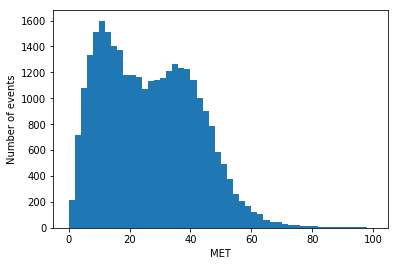

In [25]:
x=data.MET
plt.hist(x,bins=50,range=(0,100))
plt.xlabel("MET")
plt.ylabel("Number of events")
plt.yscale('linear')
plt.savefig('ostatnie/MET.pdf')
plt.show()

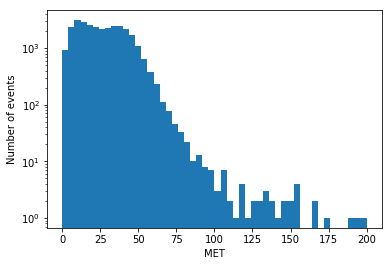

In [26]:
x=data.MET
plt.hist(x,bins=50,range=(0,200))
plt.xlabel("MET")
plt.ylabel("Number of events")
plt.yscale('log')
plt.savefig('ostatnie/METlog.pdf')
plt.show()

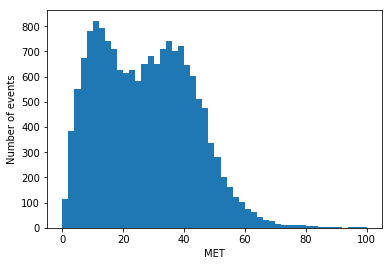

In [27]:
x=(data.loc[data.Q==1]).MET
plt.hist(x,bins=50,range=(0,100))
plt.xlabel("MET")
plt.ylabel("Number of events")
plt.yscale('linear')
plt.savefig('ostatnie/MET+1.pdf')
plt.show()

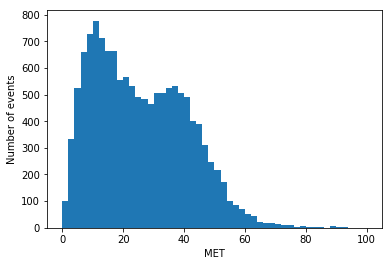

In [28]:
x=(data.loc[data.Q==-1]).MET
plt.hist(x,bins=50,range=(0,100))
plt.xlabel("MET")
plt.ylabel("Number of events")
plt.yscale('linear')
plt.savefig('ostatnie/MET-1.pdf')
plt.show()

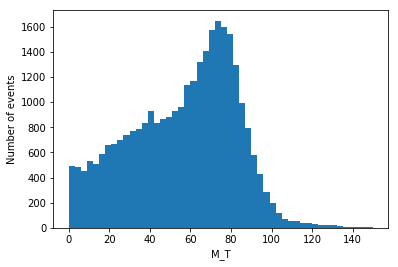

In [29]:
x=data.MT
plt.hist(x,bins=50,range=(0,150))
plt.xlabel("M_T")
plt.ylabel("Number of events")
plt.yscale('linear')
plt.savefig('ostatnie/M_T.pdf')
plt.show()

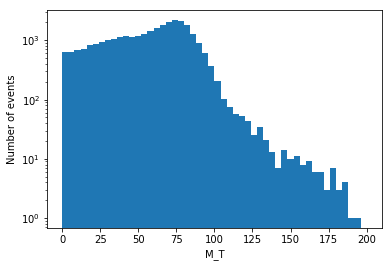

In [30]:
x=data.MT
plt.hist(x,bins=50,range=(0,200))
plt.xlabel("M_T")
plt.ylabel("Number of events")
plt.yscale('log')
plt.savefig('ostatnie/M_Tlog.pdf')
plt.show()

In [31]:
region="EB"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)):
    print(len(newdata.loc[(newdata[zmienna[i]]<ciecia[region][i]) & (newdata.type==region)])/all)
print(all)  


0.9158077354832126
0.8955199510154097
0.6172466578222268
0.46970098989692827
0.8655372997244617
48995


In [32]:
region="EE"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)):
    print(len(newdata.loc[(newdata[zmienna[i]]<ciecia[region][i]) & (newdata.type==region)])/all)

0.9644757324411608
0.7542575683650473
0.5849074138612022
0.7090448641992518
0.4747333937408518


In [33]:
cieteEB=[newdata,newdata,newdata,newdata,newdata,newdata] #
cieteEE=[newdata,newdata,newdata,newdata,newdata,newdata] # dane przedstawiajace wyciete bez jednej szczegolnej zmienne

In [36]:
region="EB"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)+1):
    data=newdata.loc[newdata.type==region]
    for j in range(len(zmienna)):
        if(j!=i): data=data.loc[(data[zmienna[j]]<ciecia[region][j]) & (data.type==region)]
    print(len(data)/all)
    cieteEB[i]=data


0.3784059597918155
0.3762832942136953
0.4093887131339933
0.5389733646290438
0.3770588835595469
0.36773140116338404


In [38]:
region="EE"
all=len(newdata.loc[(newdata.type==region)])
for i in range(len(zmienna)+1):
    data=newdata.loc[newdata.type==region]
    for j in range(len(zmienna)):
        if(j!=i): data=data.loc[(data[zmienna[j]]<ciecia[region][j]) & (data.type==region)]
    print(len(data)/all)
    cieteEE[i]=data

0.28791152621918636
0.30203759206338143
0.3465765200622662
0.32032248321367995
0.411630770660533
0.2838224018958667


In [12]:
all=len(newdata.loc[(newdata.Q==1)])
i=6
data=newdata.loc[newdata.Q==1]
for j in range(len(zmienna)):
    if(j!=i): data=data.loc[(data[zmienna[j]]<ciecia[region][j])]
print(len(data))

10624


In [13]:
all=len(newdata.loc[(newdata.Q==-1)])
i=6
data=newdata.loc[newdata.Q==-1]
for j in range(len(zmienna)):
    if(j!=i): data=data.loc[(data[zmienna[j]]<ciecia[region][j])]
print(len(data))

8575


In [22]:
print(100000/(100000/19250*235687)*36)
print(132696/102991)

2.940340366672748
1.2884232602848793


In [10]:
rangeEB=[[0,0.030],[0,0.15],[0,0.5],[0,0.5],[0,0.4]]
rangeEE=[[0,0.060],[0,0.15],[0,0.5],[0,0.5],[0,0.3]]

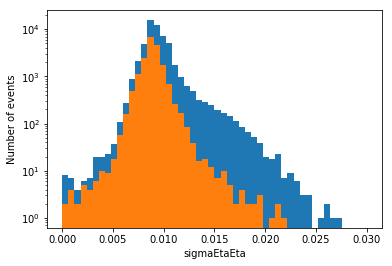

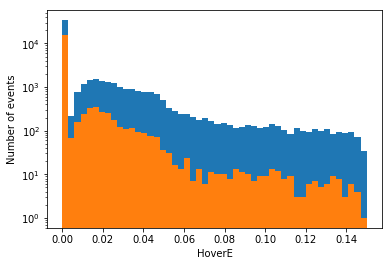

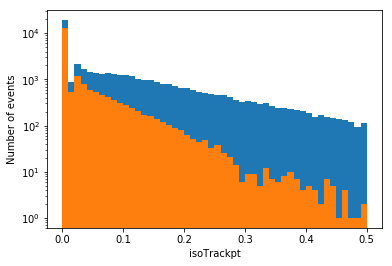

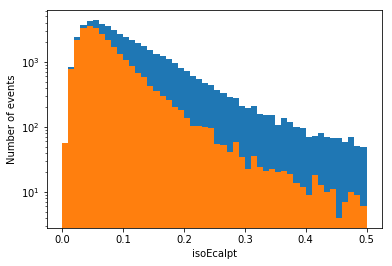

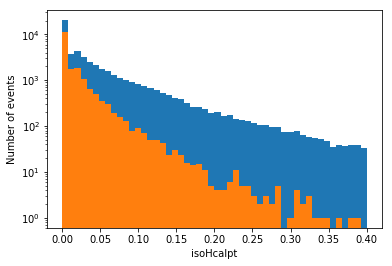

In [20]:
region="EB"
data=newdata.loc[(newdata.type==region)]
for i in range(len(zmienna)):
    x=data[zmienna[i]]
    y=cieteEB[i][zmienna[i]]
    plt.hist(x,bins=50,range=rangeEB[i])
    plt.hist(y,bins=50,range=rangeEB[i])
    plt.xlabel(zmienna[i])
    plt.ylabel("Number of events")
    plt.yscale('log')
    plt.savefig('histogramyciecia/'+region+'/'+zmienna[i]+'.pdf')
    plt.show()

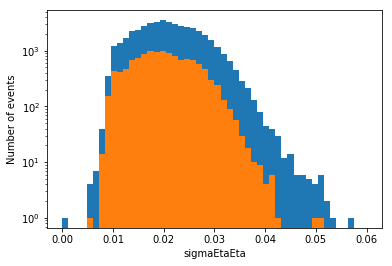

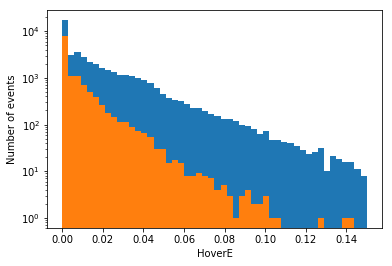

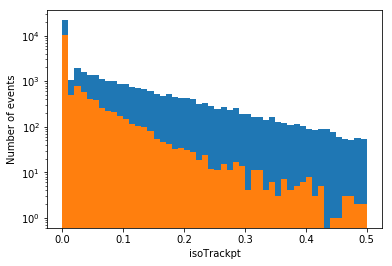

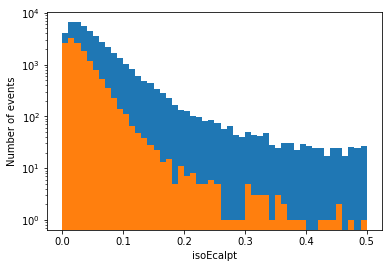

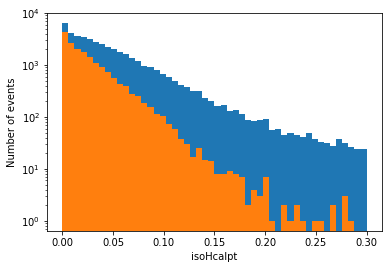

In [21]:
region="EE"
data=newdata.loc[(newdata.type==region)]
for i in range(len(zmienna)):
    x=data[zmienna[i]]
    y=cieteEE[i][zmienna[i]]
    plt.hist(x,bins=50,range=rangeEE[i])
    plt.hist(y,bins=50,range=rangeEE[i])
    plt.xlabel(zmienna[i])
    plt.ylabel("Number of events")
    plt.yscale('log')
    plt.savefig('histogramyciecia/'+region+'/'+zmienna[i]+'.pdf')
    plt.show()